# Single Application Power consumption Measurement


Type the name of the single application for measuring power consumption: svchost
Application name:  svchost
Power consumption of single application :  5.420921875
Total Power Consumption :  10225474.764828123
%power consumed by single application 5.301388932713403e-05


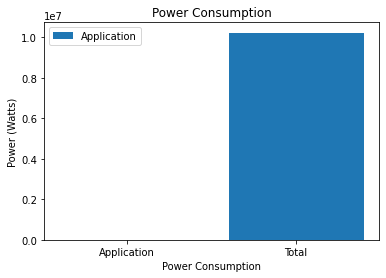

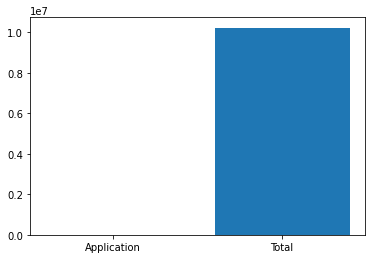

In [8]:
#psutil (process and system utilities) library
import psutil
import matplotlib.pyplot as plt


#get_process_pids function return the list of process id which is related to particular single application 
def get_process_pids(process_name):
    #process or single application file extension
    extension=".exe"
    #add the extension at the end off application name
    process=process_name+extension
    #Take a list which store the all processes of single application which are currently running
    List=[]
    
    #psutil.process_iter function iterate over all running processes on the system.
    for proc in psutil.process_iter():
        #exception handling using try and except
        try:
            #iterate all process name (currently in running state) and matching with the input process name
            if proc.name() == process:
                #when we get desired process just append in to the List
                List.append(proc.pid)
        
        #any abnormal situation occure just pass
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass
    #return the list of process id's
    return List



#power consumption function measure the power consumed by single application and also total power consumption by all
#running application
def Power_consumption(pids_list):
    #varible of power_consumption by process intialize with 0
    single_Application_power_consumption = 0
    # Initialize a variable to store the total energy consumed
    total_power_consumed = 0

    # Iterate over all running processes
    for proc in psutil.process_iter():
        #exception handling using try and except
        try:
            # Get the process information
            process = psutil.Process(proc.pid)
            info = process.as_dict(attrs=['pid', 'name', 'cpu_times'])
            # Get the CPU times for the process
            cpu_times = info['cpu_times']
            # Calculate the duration of the process
            duration = cpu_times.user + cpu_times.system
            # Calculate the energy consumed by the process
            energy = duration * proc.cpu_percent() / 100
            # Add the energy consumed by this process to the total energy
            total_power_consumed += energy
            
            #if the current pid is related to single application 
            if(proc.pid in pids_list):
                single_Application_power_consumption+=energy
                
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            pass
    # Return the ans list which contains both value single ans well as total energy consumption
    ans_List = []
    ans_List.append(single_Application_power_consumption)
    ans_List.append(total_power_consumed)
    
    #return ans list
    return ans_List




#power_consumption function of single application 
def power_consumption_measurement():
    #take the input as a single application name for measuring the power consumption
    process_name = input('Type the name of the single application for measuring power consumption: ')
    print("Application name: ", process_name)
    
    #call the get_process_pid function 
    pids = get_process_pids(process_name)

      
    #call the function for power consumptio with the help of psutil python library
    power_consumption = Power_consumption(pids)
    
    #single application power consumption
    print("Power consumption of single application : ", power_consumption[0]);
    
    #calculate total power consumption
    print("Total Power Consumption : ",power_consumption[1])
    
    power_consumption_ratio = ( power_consumption[0]/power_consumption[1])*100
    print("%power consumed by single application",power_consumption_ratio)
    
    # Data
    application_power = power_consumption[0]
    total_power = power_consumption[1]

    # Create a bar chart
    plt.bar(["Application", "Total"], [application_power, total_power])

    # Add axis labels
    plt.xlabel("Power Consumption")
    plt.ylabel("Power (Watts)")

    # Add title and legend
    plt.title("Power Consumption")
    plt.legend(["Application", "Total"])

    # Display the graph
    plt.show()
    
    #bar graph
    application_power_percentage = (application_power/total_power)*100
    plt.bar(["Application", "Total"], [application_power, total_power],label=[f'{application_power_percentage} %',''])

    
    
#call the power_consumption
power_consumption_measurement()


